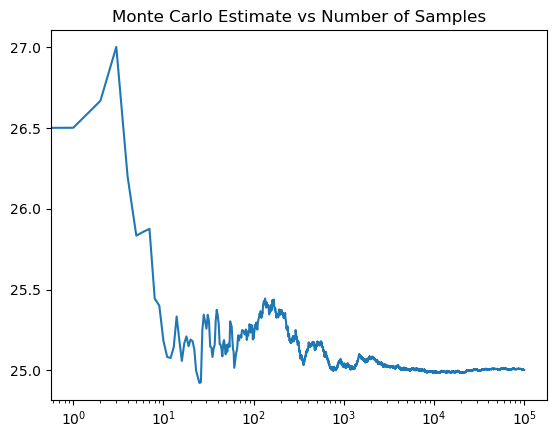

In [11]:
import jax.numpy as jnp
from jax import random
from jax import vmap
import matplotlib.pyplot as plt
#Coin tosses
N = 100

#Number of sequences of consecutive heads
def count_consecutive_heads(x):
    dx = jnp.roll(x,1) != x
    return jnp.sum(dx)/2


# Number of counts
def draw_from_count(key, N):
    x = random.randint(key, (N,), 0, 2)
    return count_consecutive_heads(x)


def monte_carlo_count(key, M, N):
    count_est = [draw_from_count(key, N)]
    ms = jnp.arange(0, M)
    for m in ms[1:]:
        key, split = random.split(key)
        count = draw_from_count(split, N)
        count_est.append((count_est[-1]*m + count)/(m+1))
    return count_est, ms
        
 

count_est, ms = monte_carlo_count(random.PRNGKey(0), 100000, N)
plt.plot(ms, count_est)
plt.title("Monte Carlo Estimate vs Number of Samples")
plt.xscale("log")

In [ ]:
count_est, ms = monte_carlo_count(random.PRNGKey(0), 100000, N)
plt.plot(ms, count_est)
plt.title("Monte Carlo Estimate vs Number of Samples")
plt.xscale("log")